In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [3]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

df_can['Total'] = df_can.sum(axis=1)

df_can.set_index('Country', inplace=True)

df_can.columns = list(map(str, df_can.columns))

years = list(map(str, range(1980, 2014)))

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

mpl.style.use(['ggplot'])

### Wordcloud

In [ ]:
!conda install -c conda-forge wordcloud --yes

In [6]:
from wordcloud import WordCloud, STOPWORDS

In [7]:
alice_novel = open('dataset/alice_novel.txt', 'r').read()

In [8]:
alice_novel

'ï»¿Project Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what

In [9]:
stopwords = set(STOPWORDS)

In [10]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

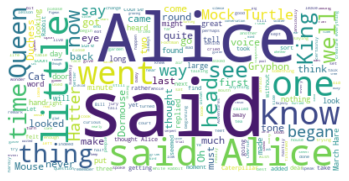

In [14]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

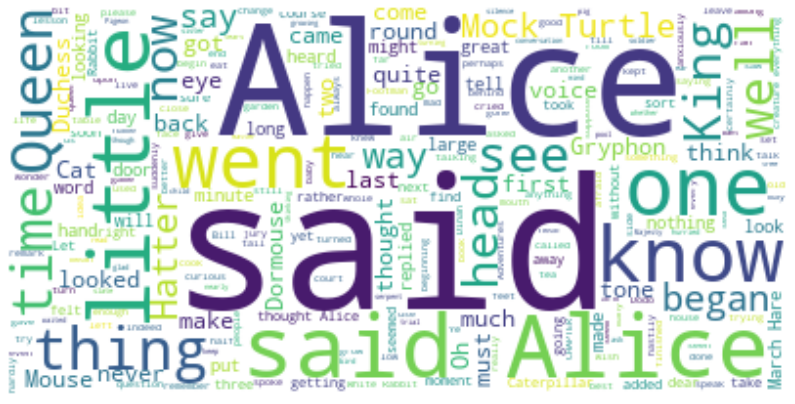

In [15]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

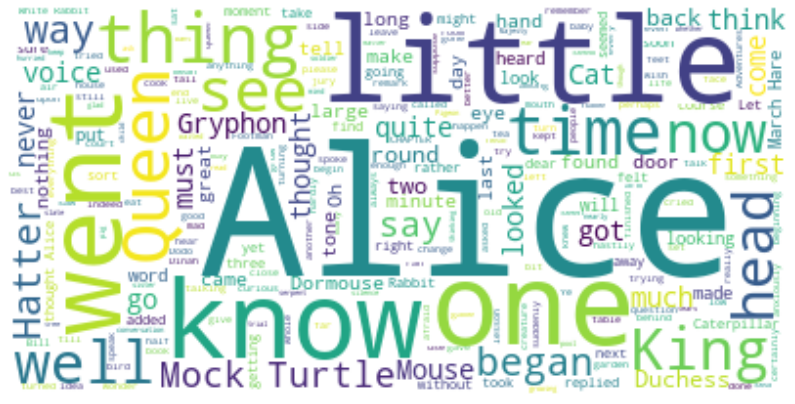

In [16]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
!pip install seaborn

The system cannot find the path specified.


In [18]:
import seaborn as sns

In [19]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


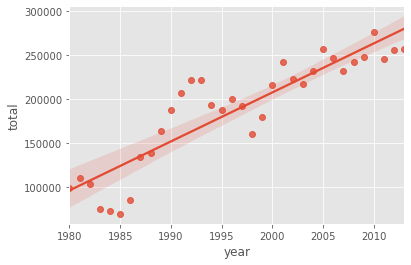

In [21]:
ax = sns.regplot(x='year', y='total', data=df_tot)

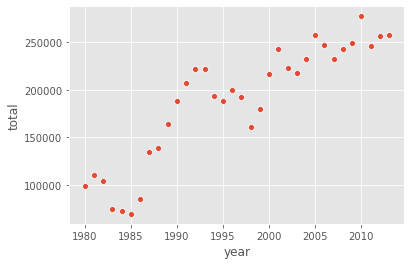

In [23]:
ax = sns.scatterplot(x='year', y='total', data=df_tot)

### Folium

In [24]:
!pip install folium

The system cannot find the path specified.


In [25]:
import folium

In [27]:
world_map = folium.Map()

In [28]:
world_map

In [37]:
world_map = folium.Map(location=[-7.0245542, 110.3470252], zoom_start=12)

world_map

In [38]:
world_map = folium.Map(location=[-7.0245542, 110.3470252], zoom_start=12, tiles='Stamen Toner')

world_map

In [39]:
world_map = folium.Map(location=[-7.0245542, 110.3470252], zoom_start=12, tiles='Stamen Terrain')

world_map